Подключение необходимых библиотек:

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import StandardScaler

### Шаг 1: Подготовка и проверка датасета



1. **Загрузка данных**: Начнем с загрузки данных из файла intern_task.csv и ознакомления с его структурой и содержимым.


In [5]:
df = pd.read_csv('smallDataset/intern_task_small.csv')
df.head()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


2. **Изучение данных**: Проанализируем основные статистики данных, проверим наличие пропущенных значений и оценим распределение значений признаков.

Анализ основных статистик данных:

Различные способы анализа данных в DataFrame с помощью библиотеки pandas в Python:

1. **df.describe()**: Этот метод выводит основные статистические характеристики числовых признаков в DataFrame, такие как среднее, стандартное отклонение, минимум, максимум и квартили. Это предоставляет общее представление о распределении числовых данных.

2. **df.nunique()**: Этот метод возвращает количество уникальных значений для каждого признака в DataFrame. Это полезно для определения количества различных категорий или уровней в категориальных признаках.

3. **df.corr()**: Этот метод вычисляет корреляционную матрицу между числовыми признаками в DataFrame. Корреляция показывает степень линейной зависимости между двумя переменными. Значения корреляции находятся в диапазоне от -1 до 1, где близкие к 1 значения указывают на положительную линейную зависимость, значения близкие к -1 указывают на отрицательную линейную зависимость, а значения близкие к 0 указывают на отсутствие линейной зависимости.

Использование этих методов помогает получить базовое понимание данных, их распределения и взаимосвязей между признаками, что полезно при предобработке данных и выборе модели машинного обучения.

In [6]:
# Вывод основных статистик числовых признаков
print(df.describe())

             rank     query_id    feature_0    feature_1    feature_2  \
count  1000.00000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.58000    83.290000     2.444000     0.175000     1.422000   
std       0.78116    42.018346     0.762526     0.557392     1.078461   
min       0.00000    10.000000     0.000000     0.000000     0.000000   
25%       0.00000    55.000000     2.000000     0.000000     0.000000   
50%       0.00000    85.000000     3.000000     0.000000     1.000000   
75%       1.00000   115.000000     3.000000     0.000000     2.000000   
max       4.00000   160.000000     3.000000     3.000000     3.000000   

         feature_3    feature_4    feature_5    feature_6    feature_7  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      0.445000     2.460000     0.901500     0.066833     0.537833  ...   
std       0.726294     0.744953     0.240705     0.210805     0.401846  ...   
min       0.000000     0.0

In [7]:
# Вывод количества уникальных значений для каждого признака
print(df.nunique())

rank             5
query_id        11
feature_0        4
feature_1        4
feature_2        4
              ... 
feature_139      5
feature_140    919
feature_141    350
feature_142     92
feature_143    123
Length: 146, dtype: int64


In [8]:
# Вывод корреляционной матрицы между признаками
print(df.corr())

                 rank  query_id  feature_0  feature_1  feature_2  feature_3  \
rank         1.000000 -0.030594   0.015931   0.106902   0.252184   0.123327   
query_id    -0.030594  1.000000  -0.048449  -0.004520  -0.048672   0.041196   
feature_0    0.015931 -0.048449   1.000000   0.047810   0.336727  -0.006471   
feature_1    0.106902 -0.004520   0.047810   1.000000   0.140128   0.180812   
feature_2    0.252184 -0.048672   0.336727   0.140128   1.000000   0.176627   
...               ...       ...        ...        ...        ...        ...   
feature_139  0.150132  0.053641  -0.069789   0.175075   0.154001   0.972735   
feature_140  0.237231  0.019176   0.116428   0.069421   0.435297   0.114901   
feature_141  0.025749  0.022922  -0.055093  -0.004696   0.029036  -0.002828   
feature_142  0.079917  0.068344   0.243066   0.181440   0.253191   0.098588   
feature_143  0.115607  0.107989   0.159609   0.188547   0.242399   0.148909   

             feature_4  feature_5  feature_6  featu

Проверка наличия пропущенных значений:

rank           0
query_id       0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_139    1
feature_140    1
feature_141    1
feature_142    1
feature_143    1
Length: 146, dtype: int64


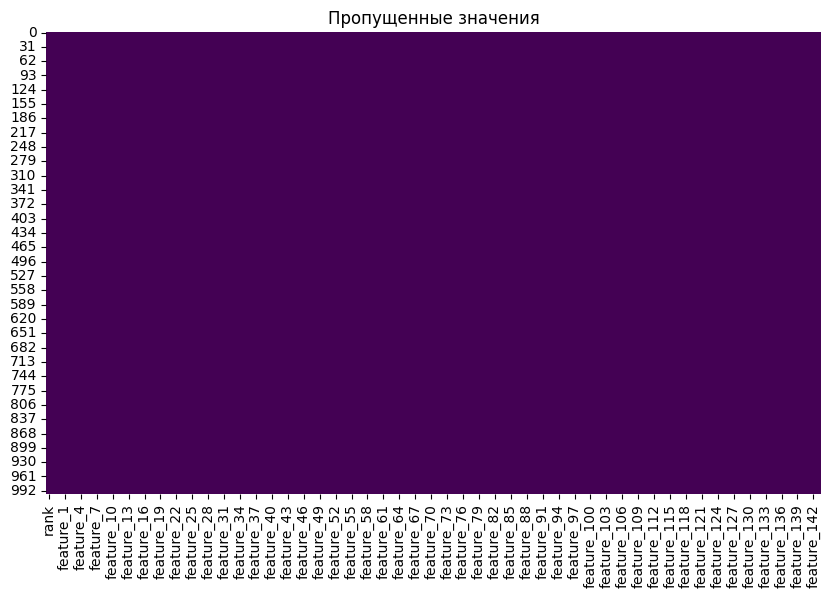

In [9]:
# Подсчет количества пропущенных значений по каждому признаку
missing_values = df.isnull().sum()
print(missing_values)

# Визуализация пропущенных значений с помощью тепловой карты
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Пропущенные значения')
plt.show()

Оценка распределения значений признаков:

/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_8047/2796691731.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


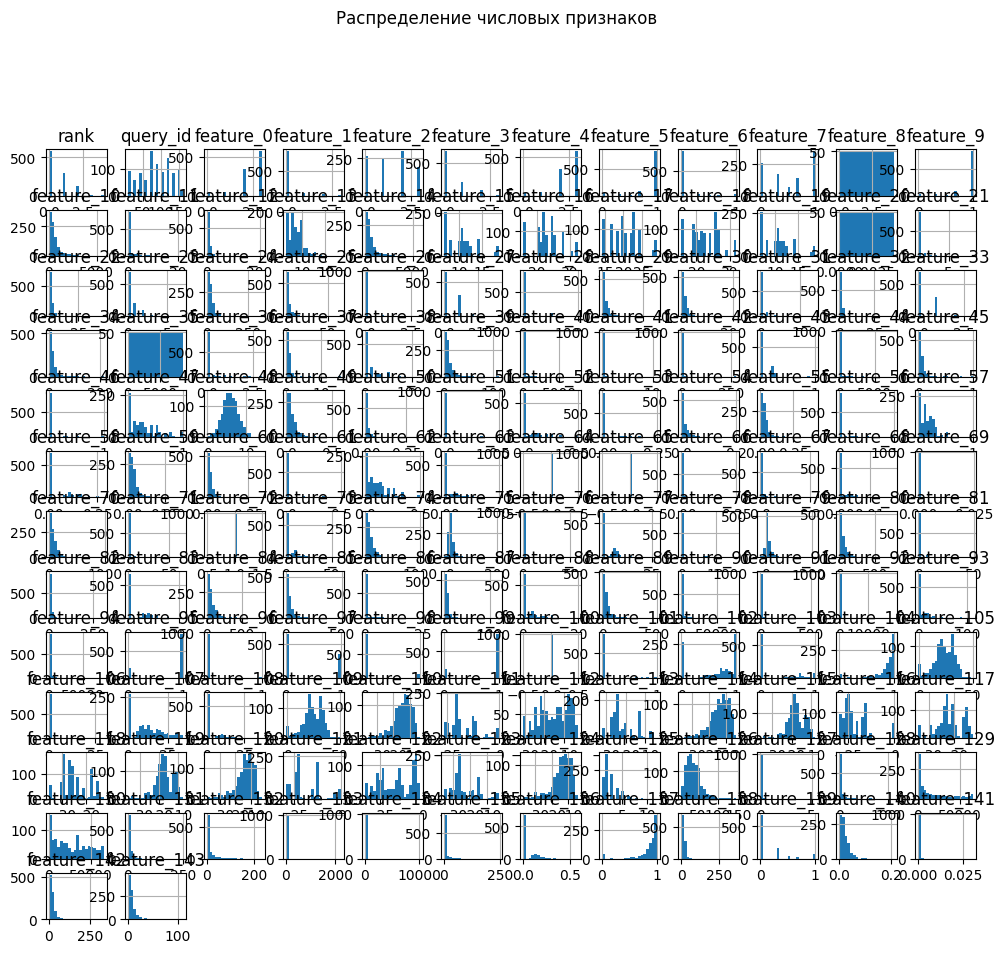

In [11]:
# Визуализация распределения числовых признаков
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Распределение числовых признаков', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

# Визуализация распределения категориальных признаков
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(15, 10))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Распределение значений признака {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()



3. **Подготовка данных**: При необходимости выполним предобработку данных, такую как обработку пропущенных значений, кодирование категориальных признаков, масштабирование признаков и т.д.


In [12]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(columns=['rank', 'query_id'])
y = df['rank']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Шаг 2: Обучение модели ранжирования



2. **Разделение данных**: Разделим данные на обучающий и тестовый наборы. Обычно используется метод кросс-валидации для оценки качества модели.


In [13]:
# Разделение отмасштабированных данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

4. **Обучение модели**: Обучим выбранную модель на обучающем наборе данных.

In [14]:
# Создание и обучение модели RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)


### Шаг 3: Оценка модели



1. **Оценка качества модели**: Оценим качество модели на тестовом наборе данных, используя метрики ранжирования, такие как Normalized Discounted Cumulative Gain (NDCG), Mean Average Precision (MAP) и т.д.


In [15]:
# Предсказание рангов на тестовом наборе
y_pred = rf_model.predict(X_test)

# Вычисление метрики ранжирования NDCG@5
ndcg_5 = ndcg_score(np.expand_dims(y_test, axis=0), np.expand_dims(y_pred, axis=0), k=5)
print("NDCG@5 на тестовом наборе данных:", ndcg_5)

NDCG@5 на тестовом наборе данных: 0.7681947058693686



### Шаг 4: Выводы и заключение



1. **Сводка результатов**: Подведем итоги проведенного анализа и оценки модели.



2. **Рекомендации**: Если есть, предложим рекомендации по дальнейшим действиям, таким как улучшение модели, дополнительный анализ данных и т.д.



3. **Заключение**: Заключим проект, подчеркнув его важность и результаты, достигнутые в процессе.

